# Descriptive statistics and graphs
There are three datasets which should be described.

First we need to adjust some settings.

In [2]:
Sys.setlocale(category = "LC_ALL", locale = "UTF-8")
path <- "~/Yandex.Disk.localized/Университет/Магистратура/2semester/R/Lecture-1/Datasets/"

[1] "C/UTF-8/C/C/C/C"

Then install required libraries.

In [6]:
required_packages <- c("psych", "dplyr")
new_packages <- required_packages[!(required_packages %in% installed.packages()[,"Package"])]
if(length(new_packages)) install.packages(new_packages)

library(psych)
library(dplyr)

## Babyboom
The dataset contains the time of birth, sex, and birth weight for each of 44 babies born in one 24-hour period at a Brisbane, Australia, hospital. Also included is the number of minutes since midnight for each birth.

Variables:
* Time of birth recorded on the 24-hour clock
*  Sex of the child (1 = girl, 2 = boy)
*  Birth weight in grams
*  Number of minutes after midnight of each birth

In [8]:
bb <- read.table(file = paste0(path, "babyboom.dat.txt"), header = F, col.names = c("time", "sex", "weight", "minutes"))
bb$sex <- as.factor(bb$sex)
male <- subset(bb, sex == "1")
female <- subset(bb, sex == "2")

Describe data with ***describe*** and ***summary*** functions.

In [9]:
describe(bb$weight)
summary(bb$weight)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,44,3275.955,528.0325,3404,3336.056,343.9632,1745,4162,2417,-1.078636,0.6411952,79.60389


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1745    3142    3404    3276    3572    4162 

From the results above we can see that distribution of babies'' weights are skewed to right.

Next we need to examine the graphs of weights and minutes between borns.

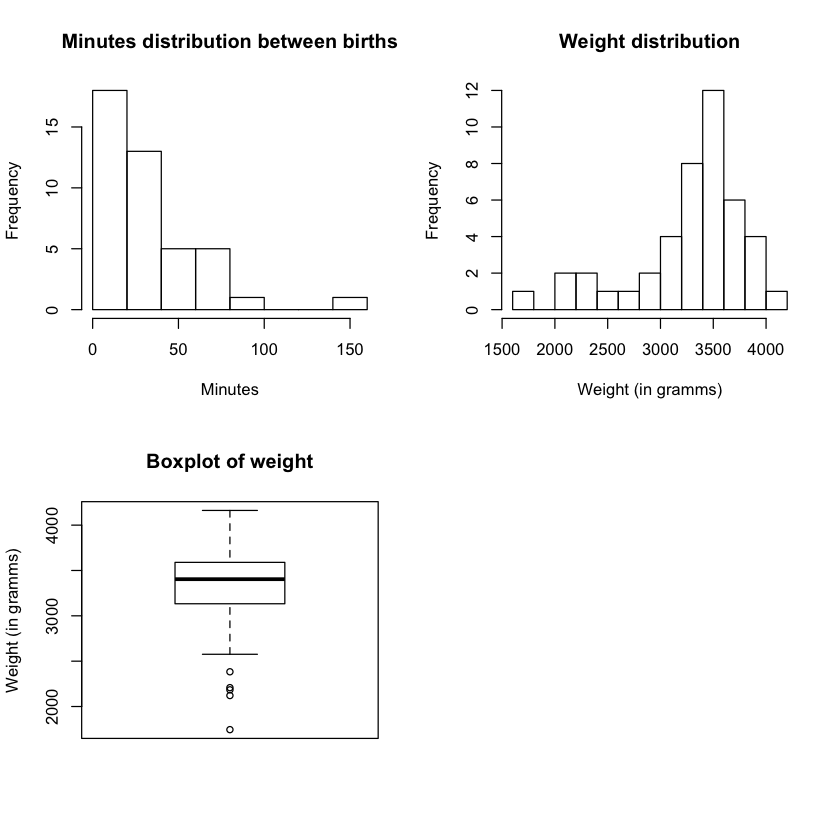

In [36]:
par(mfrow = c(2, 2))

minutes_diff <- diff(bb$minutes)
hist(minutes_diff, main = "Minutes distribution between births", xlab = "Minutes", breaks = 10)

hist(bb$weight, main = "Weight distribution", xlab = "Weight (in gramms)", breaks = 10)
boxplot(bb$weight, ylab = "Weight (in gramms)", main = "Boxplot of weight")

As we can see, distribution of minutes before births is closed to exponential. Distribution of weights has two modes: for boys and for girls, so it would be better to consider these types of babies separately. Also we can see many outliers on boxplot graph: they mean that number of boys more than number of girls, so distributed skew to boys side and girls' observations are considered as outliers.